In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

from society.agent import Agent, TrainableAgent
from society.simulations.weighted import WeightedNetworkSimulation
from society.strategies.gameplay.constant import AllC, AllD
from society.strategies.gameplay.random import RandomGameplayStrategy
from society.strategies.gameplay.tft import TitForTat
from society.strategies.gameplay.qlearning import TabularQLearningGameplayStrategy
from society.visualisation.network import *
from society.action import Action

plt.rcParams["figure.figsize"] = (10, 6)

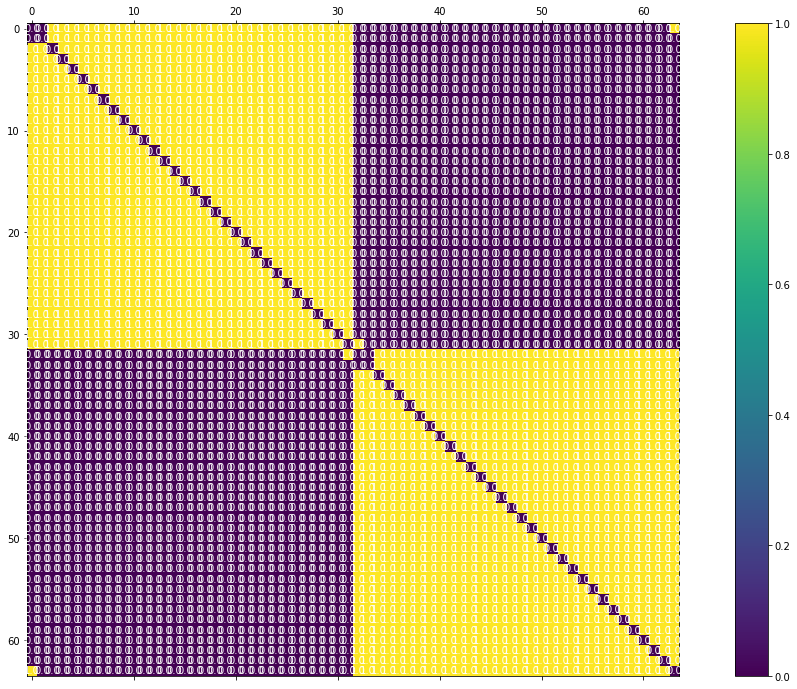

In [2]:
POPULATION = 64
agents = [
    Agent(TabularQLearningGameplayStrategy(lookback=3), i, POPULATION)
    for i in range(POPULATION)
]

G = nx.connected_caveman_graph(2, 32)

weights_matrix = np.zeros((POPULATION, POPULATION))
for u, v, d in G.edges(data=True):
    weights_matrix[u, v] = weights_matrix[v, u] = 1.0
    try:
        d["weight"] = weights_matrix[u, v]
    except:
        d["weight"] = 0

plot_matrix(weights_matrix, digits=2, figsize=(20, 12))

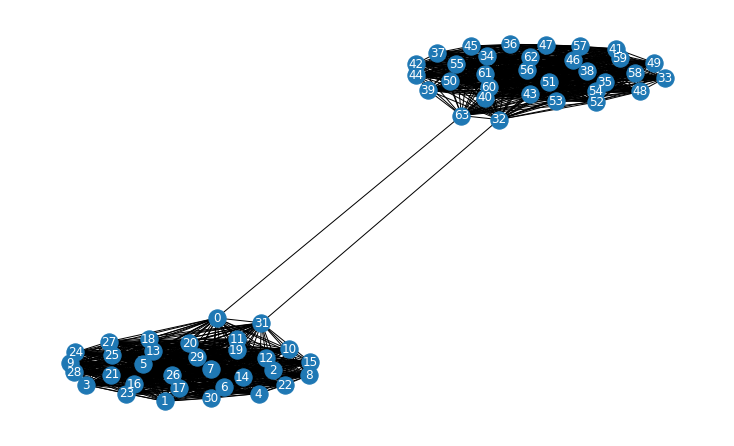

In [3]:
nx.draw(G, pos=nx.spring_layout(G), font_color="white", with_labels=True)

In [4]:
sim = WeightedNetworkSimulation(agents, weights_matrix)
sim.reset()

for i in range(10000):
    sim.play_round()


[(26, 65880), (7, 65275), (48, 65072), (23, 61467), (38, 60992), (57, 60819), (12, 60633), (20, 60112), (33, 59930), (36, 59687), (31, 59669), (41, 59306), (29, 59146), (63, 59044), (17, 58732), (58, 58576), (27, 58388), (32, 58282), (47, 58277), (44, 58263), (25, 58159), (39, 58159), (21, 58006), (45, 57681), (16, 57623), (14, 57616), (53, 57444), (42, 57428), (35, 57364), (11, 57303), (5, 57219), (61, 57178), (46, 57019), (51, 56978), (37, 56943), (40, 56813), (9, 56772), (52, 56697), (55, 56661), (60, 56590), (50, 56577), (54, 56490), (43, 56485), (34, 56464), (19, 56341), (62, 56309), (59, 56268), (2, 56213), (49, 55746), (56, 55704), (30, 55381), (28, 55172), (6, 55025), (3, 54792), (10, 54750), (8, 54730), (15, 54669), (18, 54605), (4, 54592), (24, 54555), (1, 54494), (0, 54460), (22, 54262), (13, 54222)]


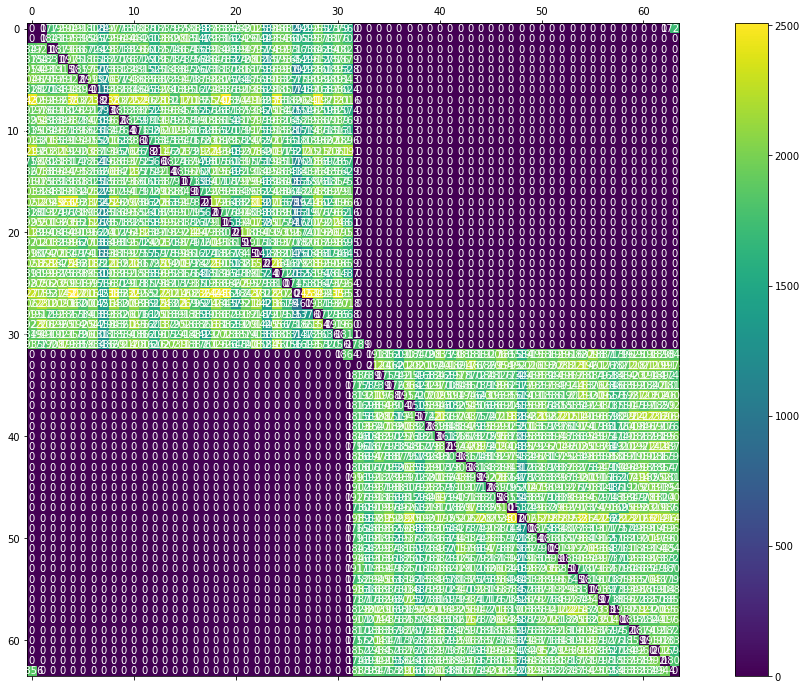

In [5]:
returns_matrix = [[sum(r) if len(r) > 0 else 0 for r in agent] for agent in sim.rewards]
ranked_partners = sorted([(i, sum(returns_matrix[i])) for i in range(POPULATION)], key=lambda x: x[1], reverse=True)
print(ranked_partners)

plot_matrix(returns_matrix, figsize=(20, 12))

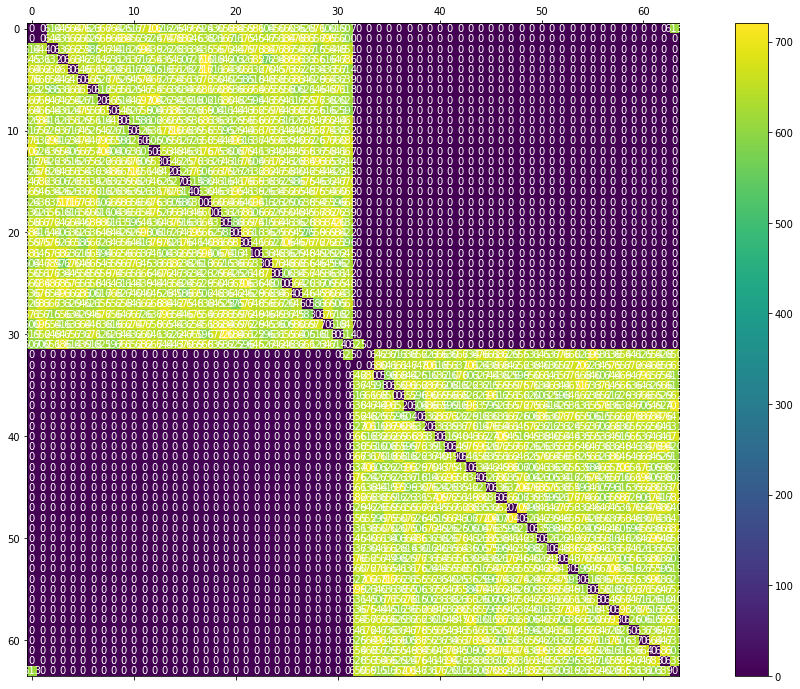

In [6]:
frequency_matrix = [[len(r) for r in agent] for agent in sim.rewards]

plot_matrix(frequency_matrix, figsize=(20, 12))

In [7]:
# dg = nx.MultiDiGraph(G)

# for u, v, d in dg.edges(data=True):
#     try:
#         d["weight"] = returns_matrix[u][v]
#     except:
#         d["weight"] = 0

# plot_graph_spring(dg)

In [8]:
# nx.drawing.nx_pydot.write_dot(dg, "test8.dot")

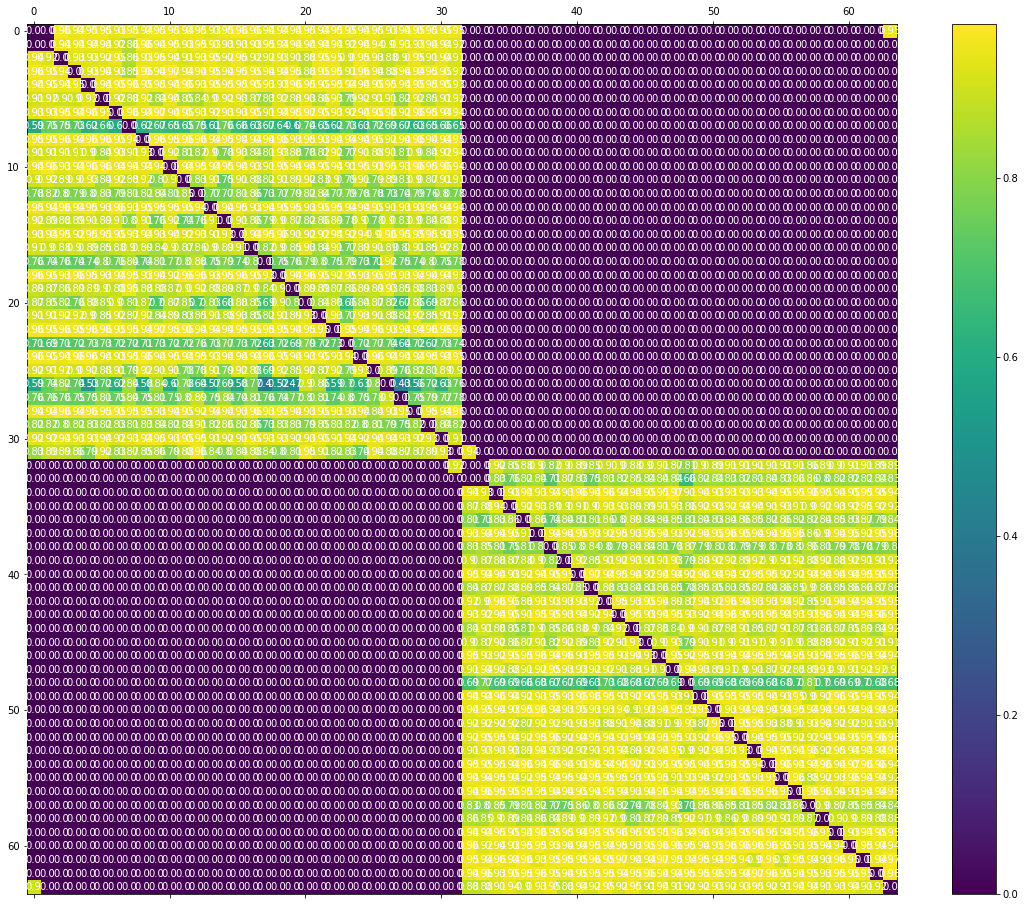

In [9]:
cooperativeness_matrix = [[r.count(Action.COOPERATE) / len(r) if r else 0 for r in agent] for agent in sim.action_histories]

plot_matrix(cooperativeness_matrix, figsize=(20, 16), digits=2)

In [10]:
# cooperativeness_graph = nx.MultiDiGraph(G)

# for u, v, d in cooperativeness_graph.edges(data=True):
#     try:
#         d["weight"] = sim.action_histories[u][v].count(Action.COOPERATE) / len(sim.action_histories[u][v])
#     except:
#         d["weight"] = 0

# plot_graph_spring(cooperativeness_graph)

# # nx.drawing.nx_pydot.write_dot(dg, "test8-coop.dot")

In [11]:
policy = np.zeros((4, 4, 4))

for agent in agents:
    policy += agent.gameplay_strategy._q_table.argmax(axis=-1)

policy /= len(agents)

policy

array([[[0.09375 , 0.125   , 0.078125, 0.125   ],
        [0.09375 , 0.140625, 0.140625, 0.109375],
        [0.046875, 0.109375, 0.125   , 0.09375 ],
        [0.09375 , 0.109375, 0.046875, 0.0625  ]],

       [[0.      , 0.125   , 0.09375 , 0.046875],
        [0.078125, 0.046875, 0.0625  , 0.0625  ],
        [0.046875, 0.0625  , 0.09375 , 0.078125],
        [0.078125, 0.0625  , 0.015625, 0.03125 ]],

       [[0.03125 , 0.046875, 0.125   , 0.125   ],
        [0.109375, 0.03125 , 0.046875, 0.03125 ],
        [0.0625  , 0.0625  , 0.03125 , 0.046875],
        [0.03125 , 0.03125 , 0.046875, 0.03125 ]],

       [[0.09375 , 0.0625  , 0.125   , 0.09375 ],
        [0.21875 , 0.015625, 0.0625  , 0.03125 ],
        [0.109375, 0.0625  , 0.015625, 0.0625  ],
        [0.109375, 0.09375 , 0.015625, 0.015625]]])

In [12]:
actions = ["(C, C)", "(C, D)", "(D, C)", "(D, D)"]

for i, a in enumerate(actions):
    for j, b in enumerate(actions):
        for k, c in enumerate(actions):
            print(f"{a:<8} {b:<8} {c:<8} => {('C', 'D')[round(policy[i, j, k])]:<4} [{round(policy[i, j, k], 5):05f}]")

(C, C)   (C, C)   (C, C)   => C    [0.093750]
(C, C)   (C, C)   (C, D)   => C    [0.125000]
(C, C)   (C, C)   (D, C)   => C    [0.078120]
(C, C)   (C, C)   (D, D)   => C    [0.125000]
(C, C)   (C, D)   (C, C)   => C    [0.093750]
(C, C)   (C, D)   (C, D)   => C    [0.140620]
(C, C)   (C, D)   (D, C)   => C    [0.140620]
(C, C)   (C, D)   (D, D)   => C    [0.109380]
(C, C)   (D, C)   (C, C)   => C    [0.046880]
(C, C)   (D, C)   (C, D)   => C    [0.109380]
(C, C)   (D, C)   (D, C)   => C    [0.125000]
(C, C)   (D, C)   (D, D)   => C    [0.093750]
(C, C)   (D, D)   (C, C)   => C    [0.093750]
(C, C)   (D, D)   (C, D)   => C    [0.109380]
(C, C)   (D, D)   (D, C)   => C    [0.046880]
(C, C)   (D, D)   (D, D)   => C    [0.062500]
(C, D)   (C, C)   (C, C)   => C    [0.000000]
(C, D)   (C, C)   (C, D)   => C    [0.125000]
(C, D)   (C, C)   (D, C)   => C    [0.093750]
(C, D)   (C, C)   (D, D)   => C    [0.046880]
(C, D)   (C, D)   (C, C)   => C    [0.078120]
(C, D)   (C, D)   (C, D)   => C   

In [13]:
best_agent = agents[ranked_partners[0][0]]

best_policy = best_agent.gameplay_strategy._q_table.argmax(axis=-1)

for i, a in enumerate(actions):
    for j, b in enumerate(actions):
        for k, c in enumerate(actions):
            print(f"{a:<8} {b:<8} {c:<8} => {('C', 'D')[best_policy[i, j, k]]:<4} {best_agent.gameplay_strategy._q_table[i, j, k]}")


(C, C)   (C, C)   (C, C)   => C    [162.0822731  156.04410666]
(C, C)   (C, C)   (C, D)   => C    [155.65686835  48.65258345]
(C, C)   (C, C)   (D, C)   => C    [154.12856851  94.23283072]
(C, C)   (C, C)   (D, D)   => C    [114.12882979   1.19896856]
(C, C)   (C, D)   (C, C)   => D    [132.78744145 155.08972227]
(C, C)   (C, D)   (C, D)   => C    [149.8011156   11.58257678]
(C, C)   (C, D)   (D, C)   => C    [85.87811581  7.9029842 ]
(C, C)   (C, D)   (D, D)   => C    [20.03955624  0.        ]
(C, C)   (D, C)   (C, C)   => D    [123.19380397 163.36719298]
(C, C)   (D, C)   (C, D)   => C    [139.3540922   13.60236812]
(C, C)   (D, C)   (D, C)   => D    [151.19990126 172.97349172]
(C, C)   (D, C)   (D, D)   => C    [150.75156296  20.21682271]
(C, C)   (D, D)   (C, C)   => C    [155.77747642  47.34050785]
(C, C)   (D, D)   (C, D)   => C    [118.74848548   2.30817543]
(C, C)   (D, D)   (D, C)   => C    [23.84175565  8.10587022]
(C, C)   (D, D)   (D, D)   => C    [0. 0.]
(C, D)   (C, C)   

In [14]:
best_agent.gameplay_strategy._q_table

array([[[[162.0822731 , 156.04410666],
         [155.65686835,  48.65258345],
         [154.12856851,  94.23283072],
         [114.12882979,   1.19896856]],

        [[132.78744145, 155.08972227],
         [149.8011156 ,  11.58257678],
         [ 85.87811581,   7.9029842 ],
         [ 20.03955624,   0.        ]],

        [[123.19380397, 163.36719298],
         [139.3540922 ,  13.60236812],
         [151.19990126, 172.97349172],
         [150.75156296,  20.21682271]],

        [[155.77747642,  47.34050785],
         [118.74848548,   2.30817543],
         [ 23.84175565,   8.10587022],
         [  0.        ,   0.        ]]],


       [[[160.12890942,  80.31484058],
         [138.87993164,   3.03561221],
         [160.51038535, 123.38977222],
         [114.71865205,   2.24822555]],

        [[155.76643649,  54.70585231],
         [ 95.35757921,   2.11339381],
         [  2.18130751,  38.5521173 ],
         [  0.        ,   0.        ]],

        [[122.03713214,  22.56123946],
         [ 

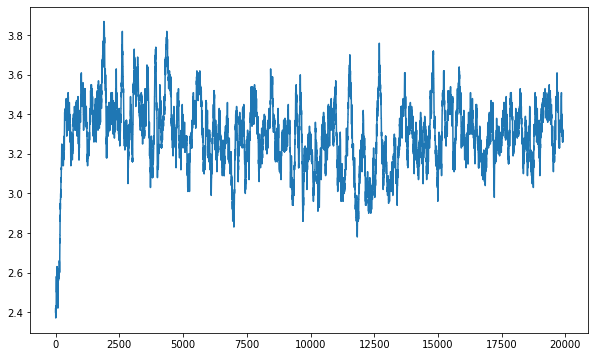

In [15]:
plt.plot(np.convolve(sim.reward_histories[ranked_partners[0][0]], np.ones(100), 'valid') / 100)

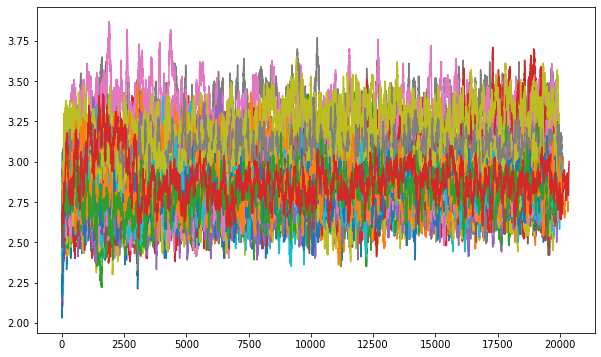

In [16]:
for partner in sim.reward_histories:
    plt.plot(np.convolve(partner, np.ones(100), 'valid') / 100)

In [17]:
worst_agent = agents[ranked_partners[-1][0]]

worst_policy = worst_agent.gameplay_strategy._q_table.argmax(axis=-1)

for i, a in enumerate(actions):
    for j, b in enumerate(actions):
        for k, c in enumerate(actions):
            print(f"{a:<8} {b:<8} {c:<8} => {('C', 'D')[worst_policy[i, j, k]]:<4}")


(C, C)   (C, C)   (C, C)   => C   
(C, C)   (C, C)   (C, D)   => C   
(C, C)   (C, C)   (D, C)   => C   
(C, C)   (C, C)   (D, D)   => C   
(C, C)   (C, D)   (C, C)   => C   
(C, C)   (C, D)   (C, D)   => C   
(C, C)   (C, D)   (D, C)   => C   
(C, C)   (C, D)   (D, D)   => C   
(C, C)   (D, C)   (C, C)   => C   
(C, C)   (D, C)   (C, D)   => C   
(C, C)   (D, C)   (D, C)   => C   
(C, C)   (D, C)   (D, D)   => C   
(C, C)   (D, D)   (C, C)   => C   
(C, C)   (D, D)   (C, D)   => C   
(C, C)   (D, D)   (D, C)   => D   
(C, C)   (D, D)   (D, D)   => C   
(C, D)   (C, C)   (C, C)   => C   
(C, D)   (C, C)   (C, D)   => C   
(C, D)   (C, C)   (D, C)   => C   
(C, D)   (C, C)   (D, D)   => C   
(C, D)   (C, D)   (C, C)   => C   
(C, D)   (C, D)   (C, D)   => C   
(C, D)   (C, D)   (D, C)   => C   
(C, D)   (C, D)   (D, D)   => C   
(C, D)   (D, C)   (C, C)   => C   
(C, D)   (D, C)   (C, D)   => C   
(C, D)   (D, C)   (D, C)   => C   
(C, D)   (D, C)   (D, D)   => C   
(C, D)   (D, D)   (C

In [18]:
policies = [
    (agents[partner[0]].gameplay_strategy._q_table.argmax(axis=-1), partner[1])
    for partner in ranked_partners
]

[
    (''.join([
        ('C', 'D')[policy[0][i, j, k]]
        for i, a in enumerate(actions)
        for j, b in enumerate(actions)
        for k, c in enumerate(actions)
    ]), policy[1])
    for policy in policies
]

[('CCCCDCCCDCDCCCCCCCCCCCDCCCCCCCCCCCDCCCCCDCCCCCDCCCCCCCCCCCCCCDCC', 65880),
 ('DCDCDDCCCCCCCCCCCCCCCCDCCCCCCCCCCCCDCCCCCCCCCCCCCCCDCCCCCCCCCCCC', 65275),
 ('DDCCCCCCCCCDDCCCCDCCCDCCCDCCDCCCDCCCDCCCCCCCCCCCDCCCCCDCCCCCCCCC', 65072),
 ('DCCDDCDCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCDCDDCDCDCCCCCCCCCCCCCCDCCC', 61467),
 ('CCCCCCDDCCCCCCCCCCCCCCCCCDDCCCCCCCCDCCCCCCCCCCCCCCCCDCCCCCCCCDCC', 60992),
 ('CCDCDCCCCCCCCCCCCCDCCCCCCCCCCCCCCCCCCCCCCCCCCDCCDDCCDCCCCCCCCCCC', 60819),
 ('CCCCCDCCCCDCCCCCCCCCCCCDCCCCCCCDCCCCCCCCCCCCCCCCCCCCCCCCDCCCCDCC', 60633),
 ('CDCCCCDCCCDCCCCCCCCCDCCCCCCCCCCCCDDCCCCCCCCCDCCCCCCCCCCCCCCCDCCC', 60112),
 ('DDCCCCDDCCDCCCCCCCCCCDCCCCCCCCCCDCCDCCCCCCCDCCCCDDCCCCCCCCCCCCCC', 59930),
 ('CDDCCCCCDCCDCCCCCCCCCCCCCCCCCDCCCCDCCCCCCCCDCCCDCCCCCCCCCCCCCCCC', 59687),
 ('CCCCCCCCDCCCCCCCCCCCCCCCCCCCCCCCCCDDCCCCCCCCCCCCCCCCCCCCCCCDCCCC', 59669),
 ('CCCCCCCCCCCCDCCCCDCCCCCDCDCCDCCCCCCCCCCCCCCCCCCCCCCCCCDCDCCCCCCC', 59306),
 ('CCCCCCCDCCCCDCCCCCCCDCCCDCCCCCCCCCCCCCCCCCCCCCCCCCDCCCCCCCCCC